In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli

# Thompson Sampling

In [2]:
class RestaurantThompsonSampler():
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        
    def get_mu_from_current_distribution(self):
        samp_mu = np.random.beta(self.a, self.b)
        return samp_mu
    
    def get_reward_from_true_distribution(self):
        s = bernoulli.rvs(self.p, size=1)[0]
        return s
    
    def update_current_distribution(self,x):
        self.a += x
        self.b += 1 - x


In [3]:
def draw_distributions(R,i):
    for r in R:
        samps = np.random.beta(r.a, r.b,1000)
        sns.kdeplot(samps, fill=True)
    plt.title('Iteration %s'%(i+1), fontsize=20)
    plt.legend(['mu=%s'%(r.p) for r in R], fontsize=16)
    plt.xlim(-3,3)
    plt.xlabel('Average Satisfacton', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    
    plt.show()

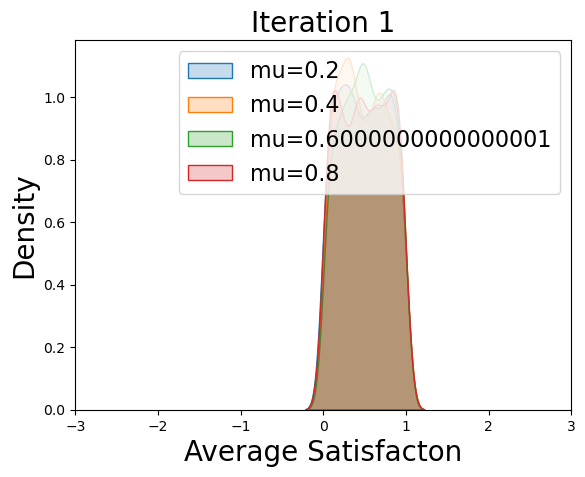

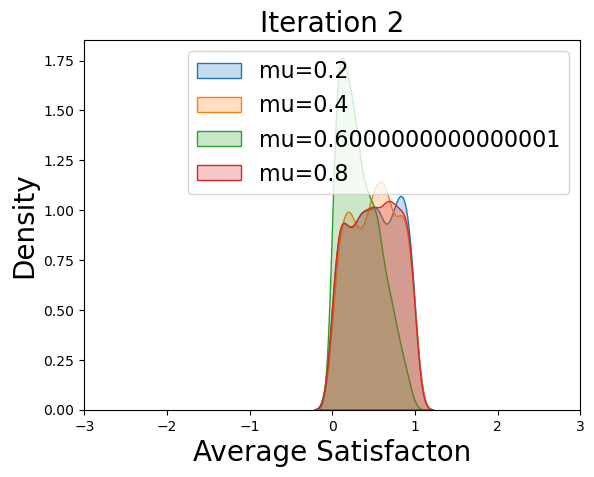

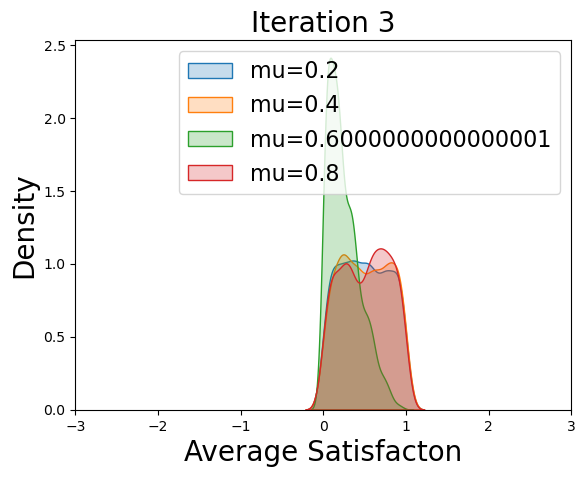

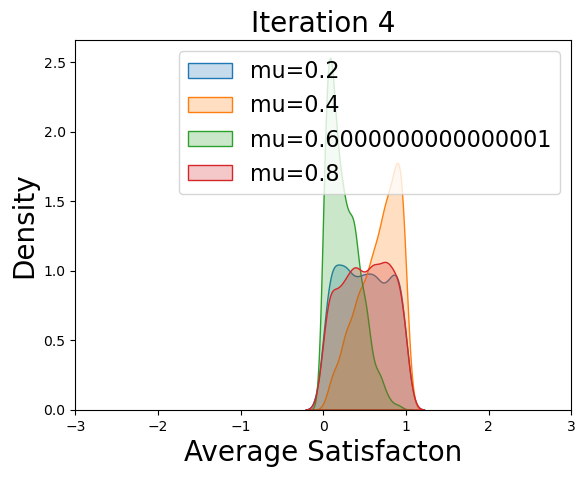

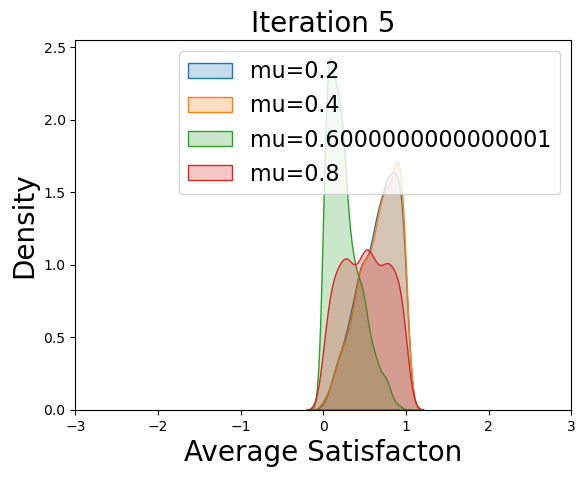

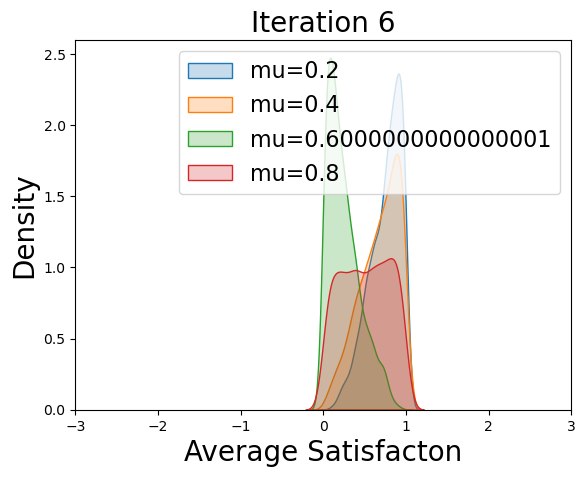

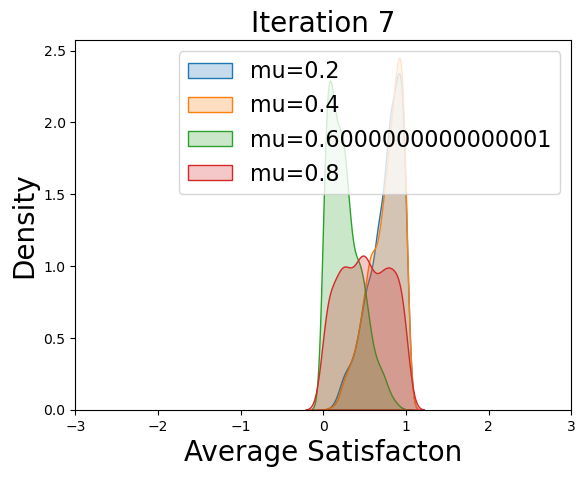

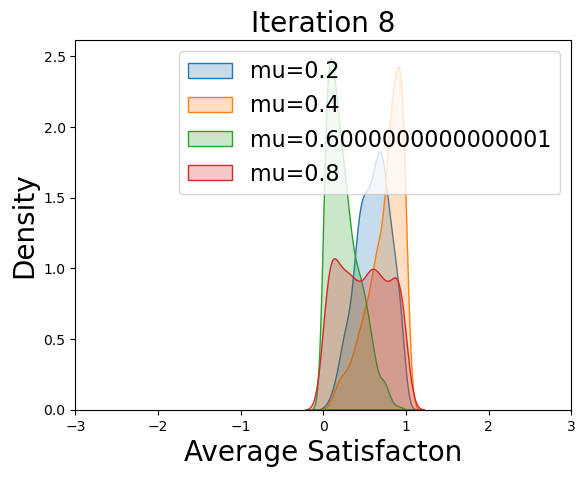

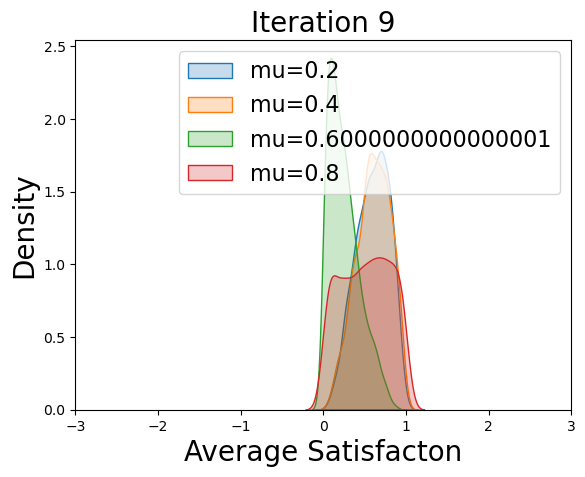

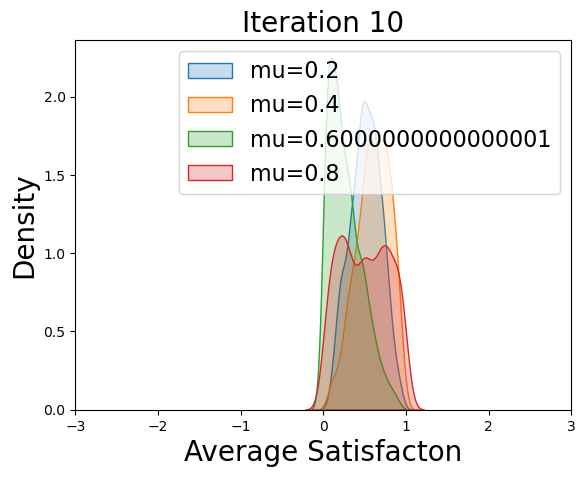

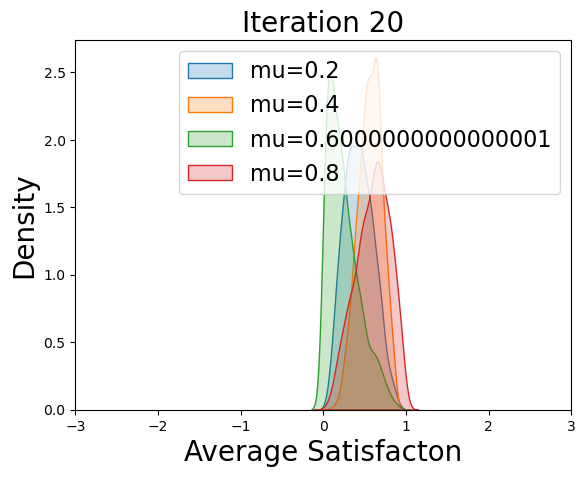

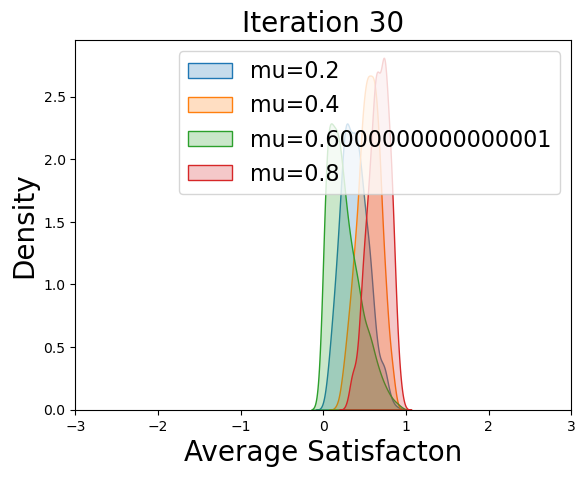

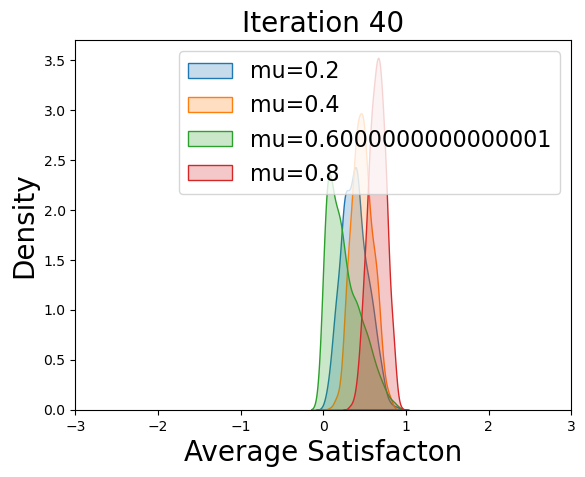

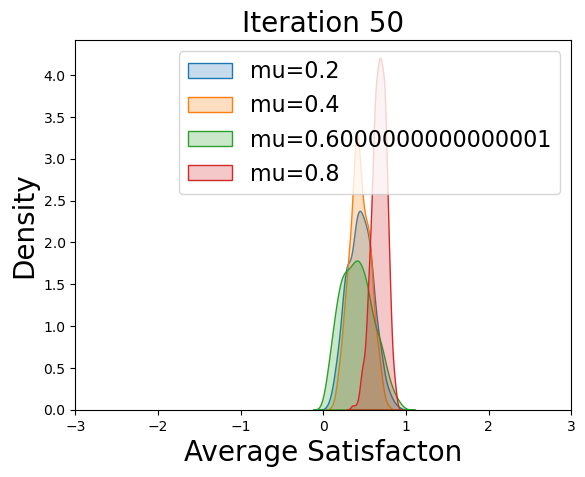

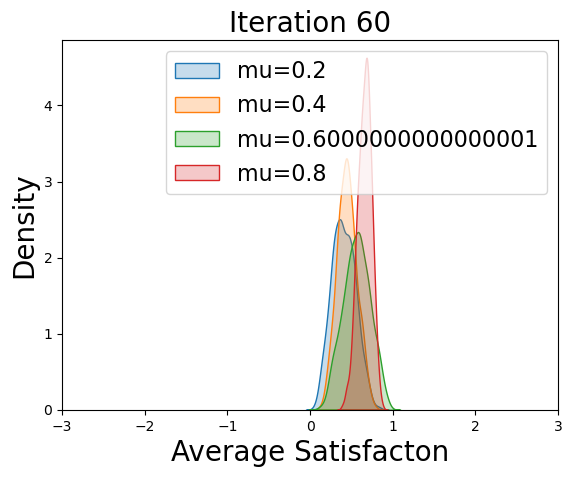

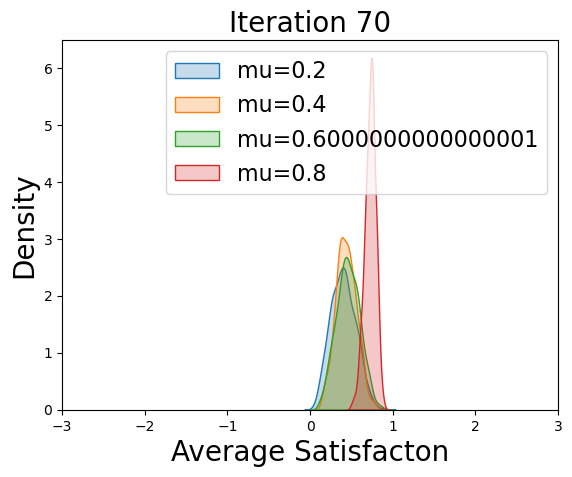

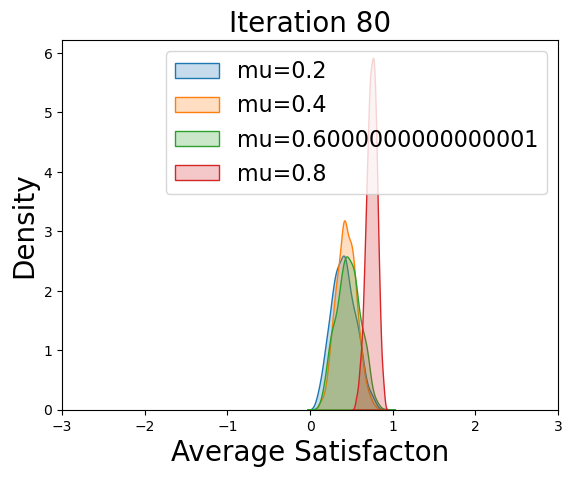

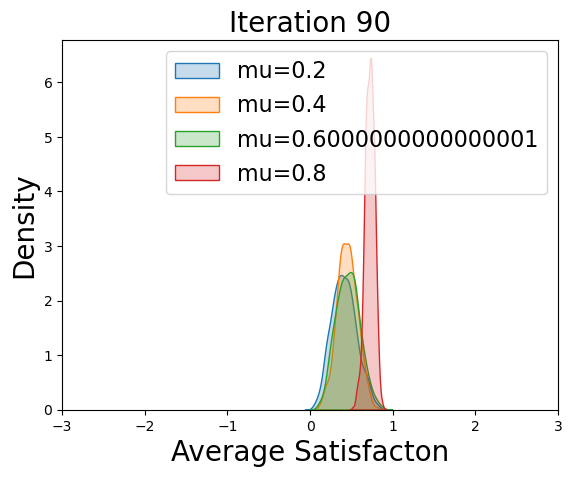

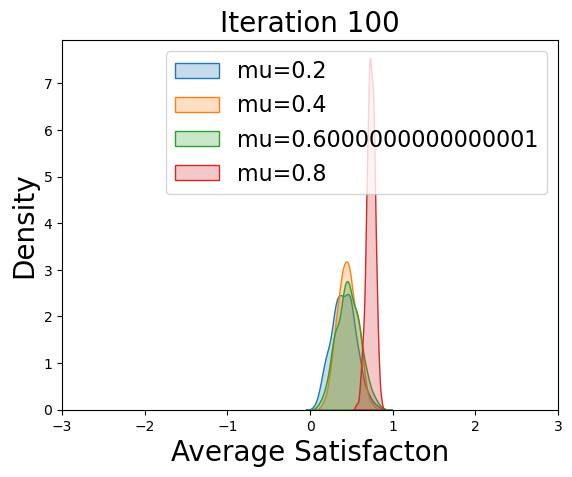

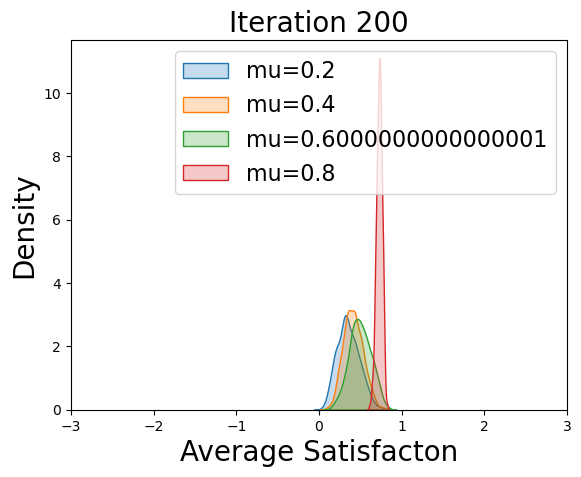

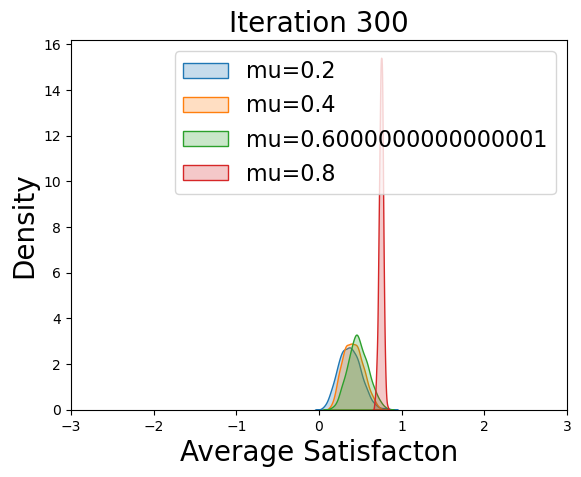

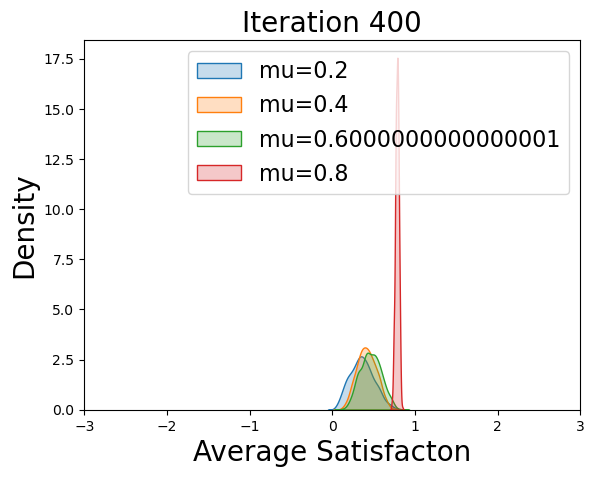

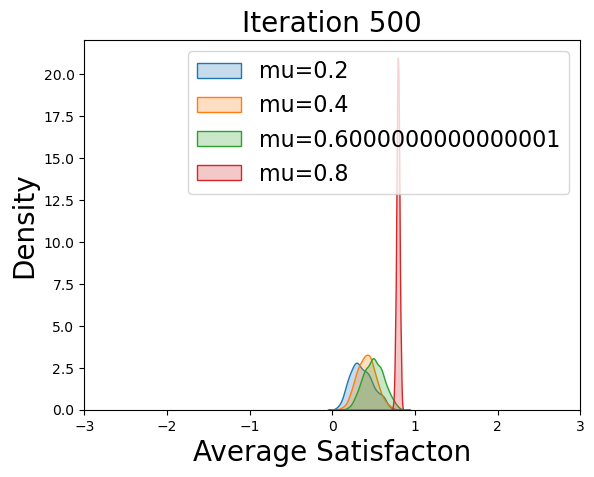

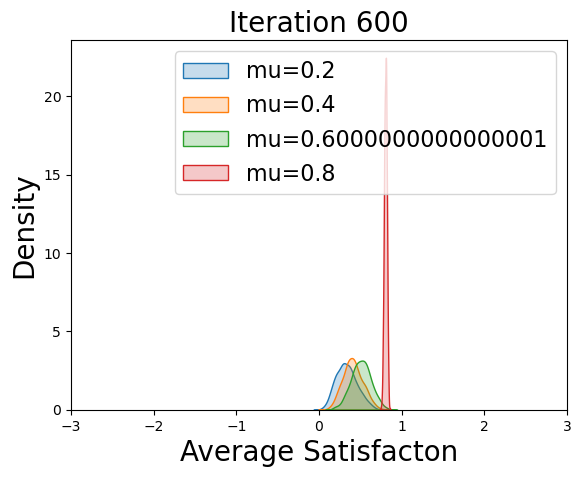

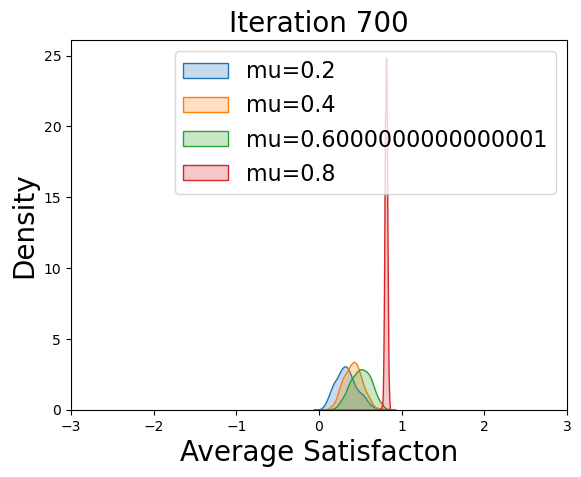

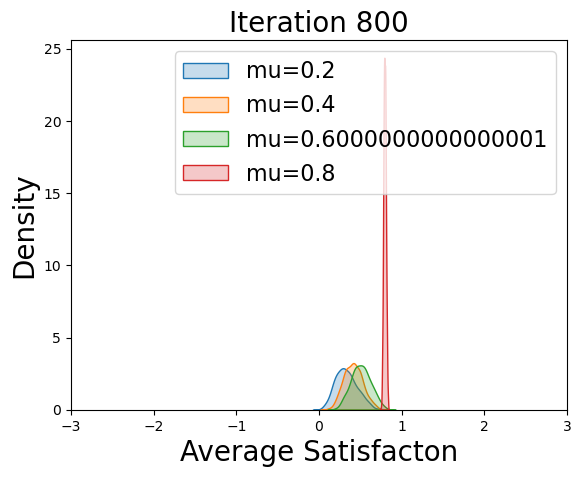

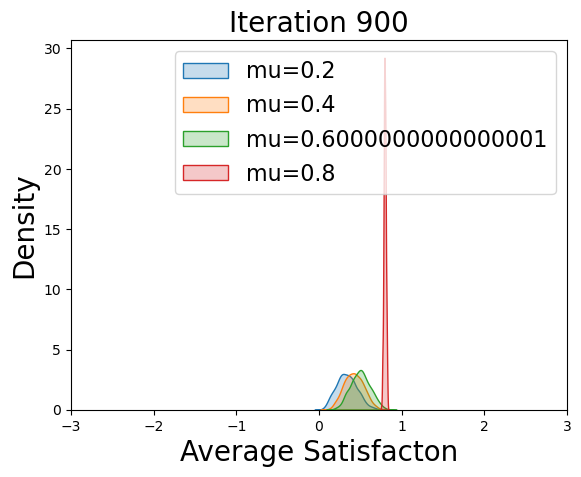

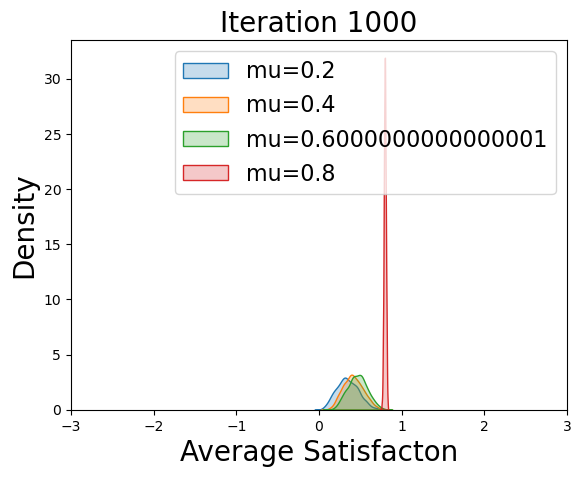

In [4]:
num_restaurants = 4
spacing = 1
R = [RestaurantThompsonSampler(i*0.2) for i in range(1, num_restaurants+1)]

for i in range(1000):
    if num_restaurants <= 10 and (i < 10 or (i < 100 and (i+1) % 10 == 0) or ((i+1) % 100 == 0)):
        draw_distributions(R,i)
    
    #get a sample from each posterior
    post_samps = [r.get_mu_from_current_distribution() for r in R]
    
    #index of distribution with highest satisfaction
    chosen_idx = post_samps.index(max(post_samps))
    
    #get a new sample from that distribution
    s = R[chosen_idx].get_reward_from_true_distribution()
    
    #update that distributions posterior
    R[chosen_idx].update_current_distribution(s)